In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

ERROR: Invalid requirement: 'matplotlib\xa0seaborn': Expected end or semicolon (after name and no valid version specifier)
    matplotlib seaborn
              ^


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = {
    'Age': [25, 34, 45, 23, 35, 52, 46, 29, 41, 38],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Income': [50000, 60000, 80000, 45000, 70000, 90000, 65000, 48000, 72000, 61000],
    'BrowsingTime': [12, 5, 15, 10, 8, 20, 9, 11, 7, 13],
    'PreviousPurchases': [3, 1, 5, 2, 4, 6, 3, 2, 1, 3],
    'Purchase': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
}


In [4]:
df = pd.DataFrame(data)



In [5]:
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})



In [6]:
# Features and target
X = df[['Age', 'Gender', 'Income', 'BrowsingTime', 'PreviousPurchases']]
y = df['Purchase']



In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Model
model = LogisticRegression()
model.fit(X_train, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [10]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


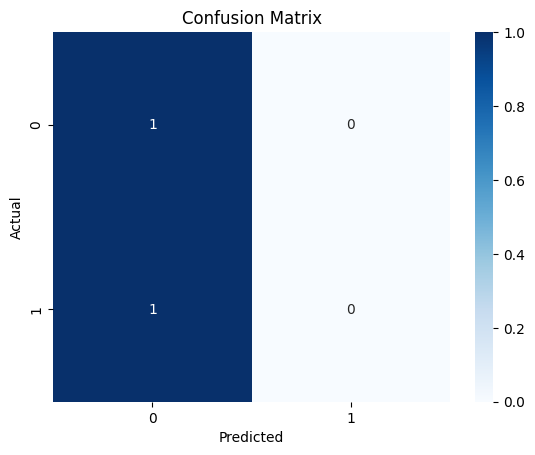

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


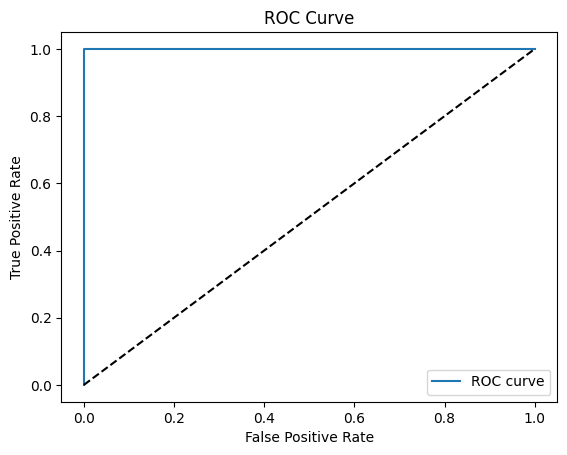

In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [15]:
# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

ROC AUC Score: 1.0
